In [29]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Load the dataset from yahoo finance library

---

In [30]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [31]:
data = load_data('TSLA')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [32]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


Visualize Closing Price

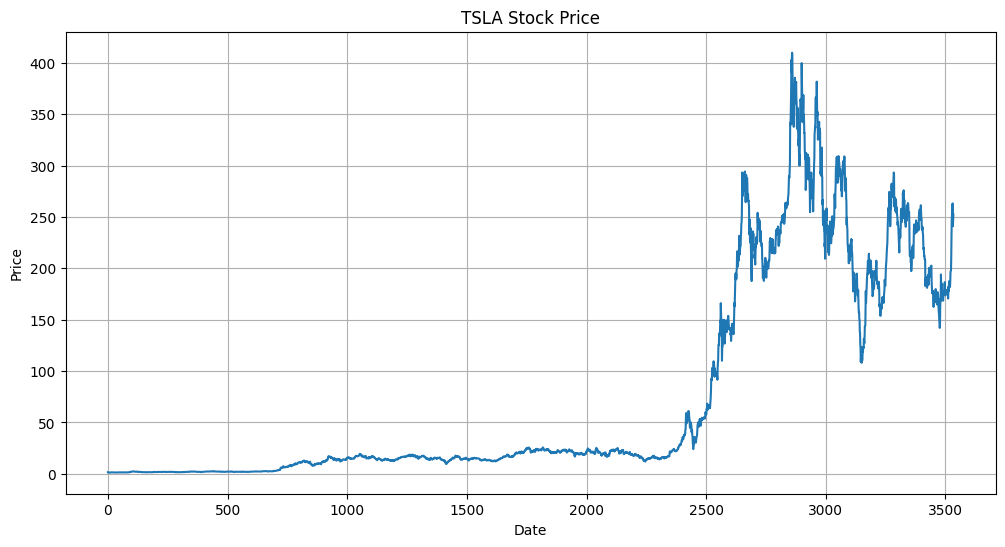

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TSLA Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [34]:
df

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
3529,251.000000,265.609985,250.300003,262.329987,160210900
3530,262.799988,267.589996,257.859985,263.260010,128519400
3531,263.299988,271.000000,239.649994,241.029999,221707300
3532,235.800003,251.839996,233.089996,248.229996,155694400


# Plotting moving averages of 100 days

---



In [35]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3529    181.5810
3530    182.3265
3531    182.7323
3532    183.2151
3533    183.8039
Name: Close, Length: 3534, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

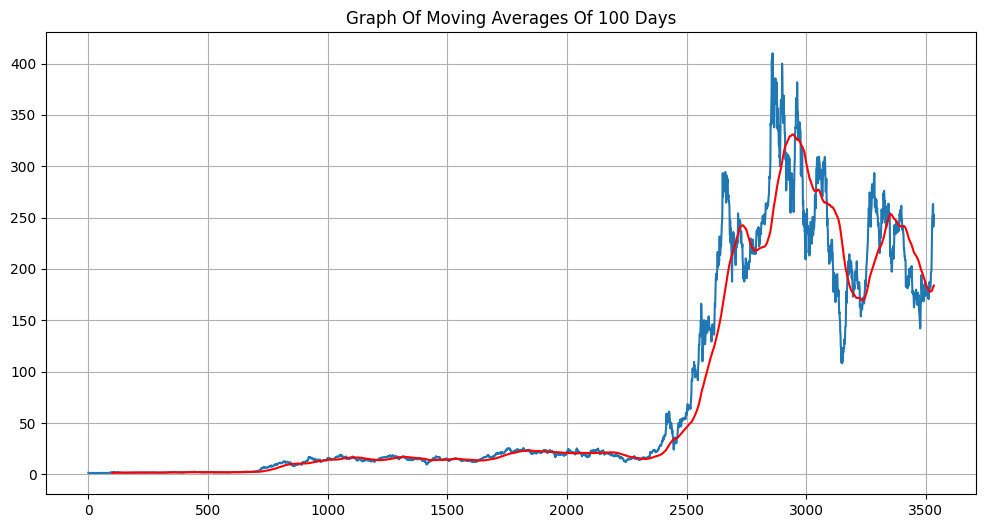

In [36]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Comparision Of 100 Days And 200 Days Moving Averages

---

In [37]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3529    205.41900
3530    205.45680
3531    205.43755
3532    205.44375
3533    205.48635
Name: Close, Length: 3534, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

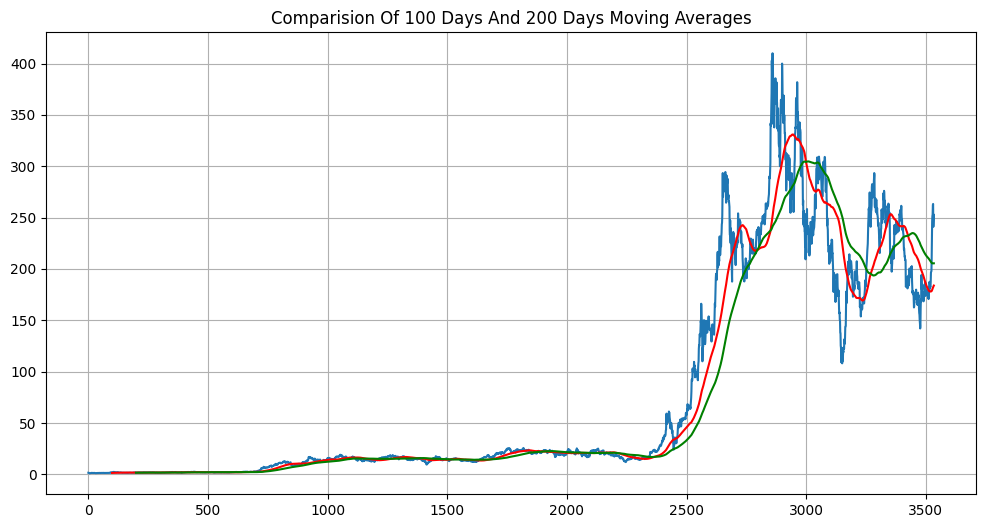

In [38]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [39]:
df.shape

(3534, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [40]:
train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2473, 7)
(1061, 7)


In [41]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [42]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2473,2020-04-27,49.174000,53.299332,49.000000,53.250000,53.250000,310221000
2474,2020-04-28,53.042667,53.666668,50.445999,51.274666,51.274666,228330000
2475,2020-04-29,52.678001,53.546665,52.210667,53.367332,53.367332,243240000
2476,2020-04-30,57.012669,57.987999,50.900002,52.125332,52.125332,427078500
2477,2020-05-01,50.333332,51.518002,45.535999,46.754665,46.754665,487977000


# Using MinMax scaler for normalization of dataset

---

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [44]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [45]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.00897275],
       [0.0089062 ],
       [0.00683215],
       ...,
       [0.79447001],
       [0.76510062],
       [0.78675056]])

In [46]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [47]:
x_train.shape

(2373, 100, 1)

# LSTM model

---

In [48]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras import Sequential

In [49]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\yuxia\PycharmProjects\StocksProject\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---

In [51]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 10) # or use 100

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - loss: 0.0245 - mean_absolute_error: 0.1107
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0046 - mean_absolute_error: 0.0459
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0064 - mean_absolute_error: 0.0503
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0034 - mean_absolute_error: 0.0363
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 0.0029 - mean_absolute_error: 0.0349
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 0.0024 - mean_absolute_error: 0.0319
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.0028 - mean_absolute_error: 0.0332
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.0022 - mean_absolute_error: 0.0304
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - loss: 0.0023 - mean_absolute_error: 0.0306
Epoch 10/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - loss: 0.0026 - mean_absolute_error: 0.0309


In [52]:
model.save('model.h5')

In [53]:
test_close.shape

(1061, 1)

In [54]:
past_100_days = pd.DataFrame(train_close[-100:])

In [55]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 columns of the training dataset to get the prediction from the 1st column of the testing dataset**

---


In [56]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [57]:
final_df.head()

,0
0,22.324667
1,22.413334
2,22.202000
3,22.024668
4,22.392668


In [58]:
input_data = scaler.fit_transform(final_df)
input_data

array([[7.73302863e-04],
       [1.00185804e-03],
       [4.57105445e-04],
       ...,
       [5.64526267e-01],
       [5.83085575e-01],
       [5.94453166e-01]])

In [59]:
input_data.shape

(1161, 1)

# Testing the model

---



In [60]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [61]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1061, 100, 1)
(1061,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [62]:
y_pred = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


In [63]:
y_pred.shape

(1061, 1)

In [64]:
y_test

array([0.080489  , 0.07539722, 0.08079145, ..., 0.56452627, 0.58308558,
       0.59445317])

In [65]:
y_pred

array([[0.03373583],
       [0.03489837],
       [0.03616605],
       ...,
       [0.48068032],
       [0.50016063],
       [0.51956   ]], dtype=float32)

In [66]:
scaler.scale_

array([0.00257768])

In [67]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

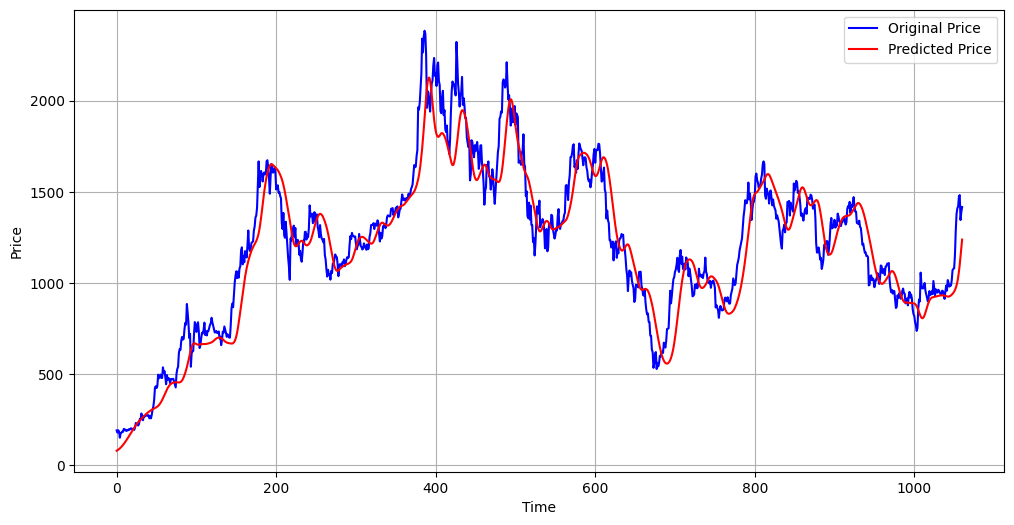

In [68]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [69]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 8.90%


Calculation of R2 score

In [70]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.8858959532305721


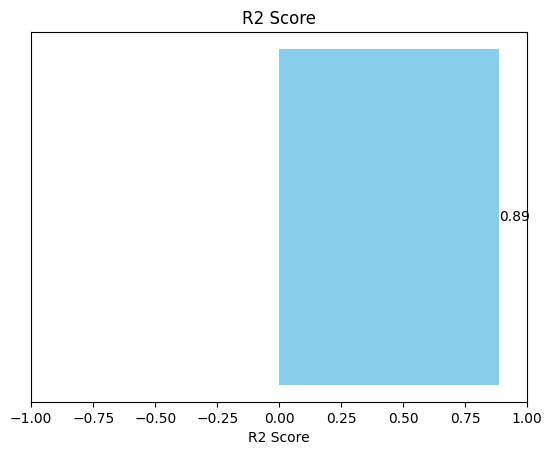

In [71]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

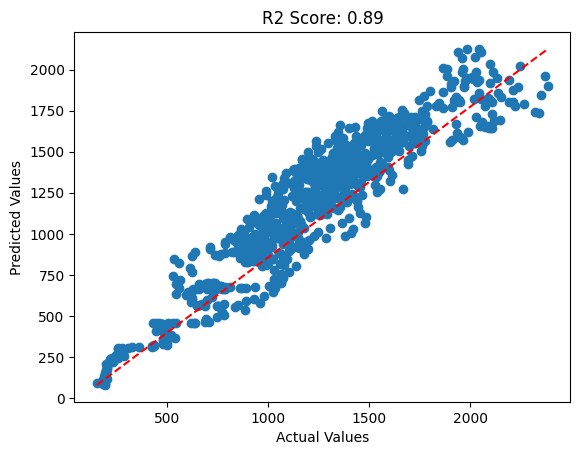

In [72]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()